# Lab Assignment One: Exploring Table Data
Arely Alcantara, Emily Fashenpour

## 1. Business Understanding

New iOS applications are constantly being developed and, obviously, their creators want the applications to be successful. The table data we found contains the names of applications, their ratings, the genre, the version, and other relevant information to describe an app. This data could be relevant to other iOS app developers who are developing apps that are similar in genre, content rating, etc. and see what other apps did well or what they did poorly.

The Mobile App Store data we found was collected in July 2017 and it features 7,000 different apps with 18 features (excluding duplicate ID and name fields). This dataset can be accessed and downloaded from kaggle.com. The purpose of collecting this data was to see how similar apps stand out or do relative to others. This data was collected by grabbing the information from the Apples's App Store API.

In analyzing this dataset, we hope to see what makes an app successful. This information could be extremely valuable to companies trying to rebrand their apps or looking at a future release. It could also show startups common mistakes in terms of the least successful apps to know what not to do, and see what they can do to be successful.

Dataset URL: https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps#AppleStore.csv

Question we're trying to address: 
    - What makes an app successful in the App Store? 
    - How do apps in different markets compare?


## 2. Data Understanding

Our dataset consists of 2 files - where one contains the general app info, and the other contains the actual app descriptions. Both of these files share id,track_name, and size_bytes - so we decided to merge this data and have one central data source.

In addition, we renamed some columns that we felt were not descriptive enough as to what they are describing - for instance, the first colum contains the index of each entry so we renamed it from 'Unnamed: 0' to 'index'. 'ipadSc_urls.num' doesn't tell us much so we renamed it to 'screenshots' as this column lists the number of screenshots displayed in the app store page for that app.

In [1]:
import pandas as pd
import numpy as np

#read data from csv using pandas
appStore = pd.read_csv('data/AppleStore.csv')
description = pd.read_csv('data/appleStore_description.csv')

#merge 2 datasets since there is 2 files for general information and the description
outer_merge = pd.merge(appStore, description, on=['id', 'track_name', 'size_bytes'], how="outer", indicator=False)

# replace the column name of 'track_name' to 'name', 'prime_genre' to 'genre', remove the .num on some column names
outer_merge = outer_merge.rename(columns = {'track_name': 'app_name', 'prime_genre': 'genre', 'sup_devices.num': 'sup_devices', 'ipadSc_urls.num':'screenshots', 'lang.num':'sup_lang', 'Unnamed: 0': 'index', 'app_desc': 'app_desc_count'})

outer_merge.head()


,index,id,app_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,genre,sup_devices,screenshots,sup_lang,vpp_lic,app_desc_count
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...


In [2]:
#show current column info with data type
print(outer_merge.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7196
Data columns (total 18 columns):
index               7197 non-null int64
id                  7197 non-null int64
app_name            7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
genre               7197 non-null object
sup_devices         7197 non-null int64
screenshots         7197 non-null int64
sup_lang            7197 non-null int64
vpp_lic             7197 non-null int64
app_desc_count      7197 non-null object
dtypes: float64(3), int64(9), object(6)
memory usage: 1.0+ MB
None


##### Removing columns that are not needed
Some columns are not crucial or necessary for us to examine, so we have decided to remove them from our analysis. Those include the index column - which just lists the index of each entry, the id column - since it is a unique identifier and doesn't add/remove value to our findings, currency column - there is only one value and it is 'USD', app_name column - the name of the app is not relevant to us, and vpp_lic column tells us Vpp Device Based Licensing Enabled and either holds a 0 or 1.

In [3]:
import numpy as np

#drop unneeded columns
outer_merge.drop(['index', 'id', 'currency', 'app_name', 'vpp_lic'], axis=1, inplace=True)

#change ordinal features to ints - ratings have .5 values so multiple by 2 to make them managable
#values for ratings and ratings versions will be between 0 and 10
outer_merge['user_rating'] = outer_merge['user_rating'].apply(lambda x: x*2).astype(np.int64)
outer_merge['user_rating_ver'] = outer_merge['user_rating_ver'].apply(lambda x: x*2).astype(np.int64)
#change content rating to values from 1 to 4
outer_merge['cont_rating'] = outer_merge['cont_rating'].map({'4+': 1, '9+': 2, '12+': 3, '17+': 4})

#we dont necessarily need description at this point but we are basing analysis on length of description
outer_merge['app_desc_count'] = outer_merge['app_desc_count'].apply(lambda x: len(x))

print(outer_merge.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7196
Data columns (total 13 columns):
size_bytes          7197 non-null int64
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null int64
user_rating_ver     7197 non-null int64
ver                 7197 non-null object
cont_rating         7197 non-null int64
genre               7197 non-null object
sup_devices         7197 non-null int64
screenshots         7197 non-null int64
sup_lang            7197 non-null int64
app_desc_count      7197 non-null int64
dtypes: float64(1), int64(10), object(2)
memory usage: 787.2+ KB
None


### 2.2 Data Quality

We have 7197 entries and every field that we need is filled - therefore we have no missing data. This makes sense because all apps have to have an app name, ratings, a version number, and overall just general information about their app.

However, if hypothetically we had missing data, we would probably go down the road of elimination since most features are crucial and unique to each type of app. We could not impute or infer missing data because it would skew our analysis and not be an accurate representation of where the app stands in comparison to other apps. Ratings, screenshots, supported languages - any of these fields could vary and we would rather remove the missing data rows to avoid misinterpreting our results.


In [4]:
#describe data
outer_merge.describe()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,sup_devices,screenshots,sup_lang,app_desc_count
count,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,1.991345e+08,1.726218,1.289291e+04,460.373906,7.053911,6.507156,1.717382,37.361817,3.707100,5.434903,1553.714186
std,3.592069e+08,5.833006,7.573941e+04,3920.455183,3.035895,3.618726,1.020983,3.737715,1.986005,7.919593,1010.574457
min,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,17.000000
25%,4.692275e+07,0.000000,2.800000e+01,1.000000,7.000000,5.000000,1.000000,37.000000,3.000000,1.000000,737.000000
50%,9.715302e+07,0.000000,3.000000e+02,23.000000,8.000000,8.000000,1.000000,37.000000,5.000000,1.000000,1366.000000
75%,1.819249e+08,1.990000,2.793000e+03,140.000000,9.000000,9.000000,2.000000,38.000000,5.000000,8.000000,2190.000000
max,4.025970e+09,299.990000,2.974676e+06,177050.000000,10.000000,10.000000,4.000000,47.000000,5.000000,75.000000,4000.000000


In [5]:
# create a dataframe to describe the data and its attributes

df_data_desc = pd.DataFrame({
    'Attribute':['size_bytes','price','rating_count_tot','rating_count_ver','user_rating','user_rating_ver',
                 'ver','cont_rating','genre','sup_devices','screenshots','sup_lang','app_desc_count'],
    #'Attribute': outer_merge.columns,
    'Description':['Size of the app in Bytes','App Price','Total number of user ratings','Number of user ratings for the current verion',
             'Average user rating for all versions','Average user rating for current version',
             'Latest version number','Content Rating','App Genre','Numebr of supporting Devices','Number of screenshots shown for display in app description',
             'Number of supported languages','Number of words in the app description'],
    'Discrete/Continuous':['Continuous','Continuous','Continuous','Continuous','Discrete','Discrete','Discrete',
                           'Discrete','Discrete','Continuous','Continuous','Continuous','Continuous'],
    'Scale':['Ratio','Ratio','Ratio','Ratio','Ordinal','Ordinal','Ordinal','Ordinal','Nominal','Ratio','Ratio',
             'Ratio','Ratio'],
    'Range':['0','1','2','3','4','5','6','1: Toddlers 4+; 2: Children 9+; 3: Teens 12+; 4: Adults 17+','23 Genres: \'Games\', \'Entertainment\', \'Social Networking\', \'Music\'...','9','10','11','12']
})

# print the description dataframe
df_data_desc

,Attribute,Description,Discrete/Continuous,Scale,Range
0,size_bytes,Size of the app in Bytes,Continuous,Ratio,0
1,price,App Price,Continuous,Ratio,1
2,rating_count_tot,Total number of user ratings,Continuous,Ratio,2
3,rating_count_ver,Number of user ratings for the current verion,Continuous,Ratio,3
4,user_rating,Average user rating for all versions,Discrete,Ordinal,4
5,user_rating_ver,Average user rating for current version,Discrete,Ordinal,5
6,ver,Latest version number,Discrete,Ordinal,6
7,cont_rating,Content Rating,Discrete,Ordinal,1: Toddlers 4+; 2: Children 9+; 3: Teens 12+; ...
8,genre,App Genre,Discrete,Nominal,"23 Genres: 'Games', 'Entertainment', 'Social N..."
9,sup_devices,Numebr of supporting Devices,Continuous,Ratio,9


## 3. Data Visualization

### 3.1 Data Exploration

CHOOSE and VISUALIZE distributions for a subset of single attributes


use histograms, kernel density estimation, box plots, etc. 


describe anything meaningful found from the visualizations


**CAN USE other sourses to boost visualizations

VISUALIZE at least 5 attributes (one categorical, one numerical)

In [7]:
#Visualize Relationships between a subset of attributes.

#use visualization method


#explain any interesting relationships

#visualize at least 3 subsets

In [40]:
# for each average rating, how does the description word count, number of screenshots, supported languages, 
# and price correlate

import matplotlib.pyplot as plt
%matplotlib inline

df_grouped_rating = outer_merge.groupby(by='user_rating')
for rat, grp in df_grouped_rating:
    print('There were',len(grp),'apps with a rating of',str(rat/2)+'.')
    
print('\nAverage description words per rating.\n',df_grouped_rating.app_desc_count.sum()/df_grouped_rating.app_desc_count.count())

There were 929 apps with a rating of 0.0.
There were 44 apps with a rating of 1.0.
There were 56 apps with a rating of 1.5.
There were 106 apps with a rating of 2.0.
There were 196 apps with a rating of 2.5.
There were 383 apps with a rating of 3.0.
There were 702 apps with a rating of 3.5.
There were 1626 apps with a rating of 4.0.
There were 2663 apps with a rating of 4.5.
There were 492 apps with a rating of 5.0.

Average description words per rating.
 user_rating
0      885.167922
2      958.250000
3     1058.857143
4     1227.056604
5     1414.224490
6     1416.000000
7     1553.304843
8     1737.679582
9     1753.145700
10    1471.957317
Name: app_desc_count, dtype: float64


Text(0, 0.5, 'Rating')

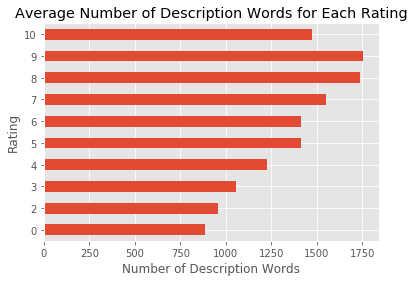

In [41]:
plt.style.use('ggplot')

avg_desc_words = df_grouped_rating.app_desc_count.sum()/df_grouped_rating.app_desc_count.count()
avg_plt = avg_desc_words.plot(kind = 'barh')
plt.title('Average Number of Description Words for Each Rating')
plt.xlabel('Number of Description Words')
plt.ylabel('Rating')